TITANIC MACHINE LEARNING FROM DISASTER

In [73]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plot


In [74]:
train_data = pd.read_csv('./data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# check missing values
train_data.isnull().sum()
# check NaN values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
# get sense of data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)

print("% of women who survived:", rate_women)
print("% of men who survived:", rate_men)


% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [78]:
num_men = train_data.loc[train_data.Sex == 'male'].count()[0]
num_women = train_data.loc[train_data.Sex == 'female'].count()[0]

print('num of men present', num_men)
print('num of women present', num_women)

num of men present 577
num of women present 314


In [79]:
# check columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
# Remove columns that we consider irrelevants for the correlation
train_data = train_data.drop(['Name', 'Ticket', 'Embarked', 'Cabin'], axis=1)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


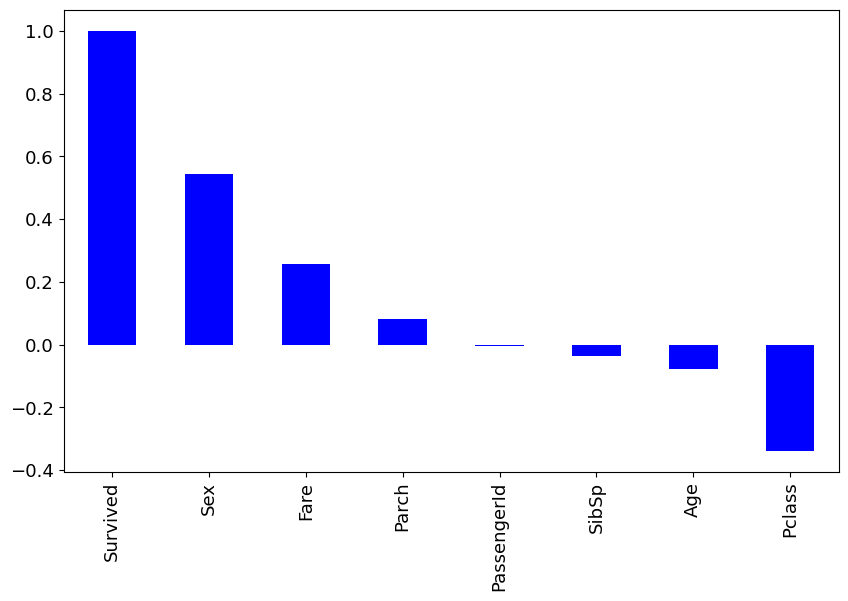

In [81]:

# Label encoding the gender column
train_data['Sex'] = train_data['Sex'].replace({'male': 0, 'female': 1})
# create correlation matrix
corr_matrix = train_data.corr()
plot = corr_matrix['Survived'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='b', fontsize=13)

### PassengerId is irrelevant. Age should be relevant, but maybe because of the missing values it is not showing up.
### The more are kept close to 0, the features are less correlated to the target variable.

- We are not sure about the age, so we will keep it for now, and consider filling the missing values later.
- we will drop the PassengerId column, as it is not relevant to the survival of the passenger.
- we will drop Parch and SibSp, as they are not correlated to the survival of the passenger.

In [82]:
# drop columns
train_data = train_data.drop(['PassengerId', 'Parch', 'SibSp'], axis=1)
train_data

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
888,0,3,1,NaN,23.4500
889,1,1,0,26.0,30.0000


In [83]:
# check missing values
train_data.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

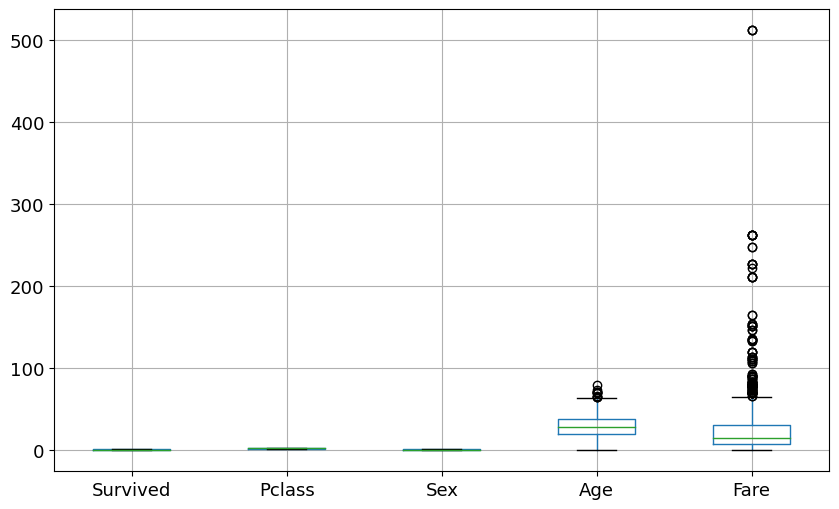

In [86]:
# create a boxplot to see the distribution of Survived
plot = train_data.boxplot(column=['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], figsize=(10, 6), fontsize=13)

- Does not make any fucking sense as Survived, Pclass and Sex are cat. values and Age/Fare are numericals
- We will create a boxplot with Age as Y, and grouped by Sex and Survived

TypeError: Axes.boxplot() got an unexpected keyword argument 'columnY'

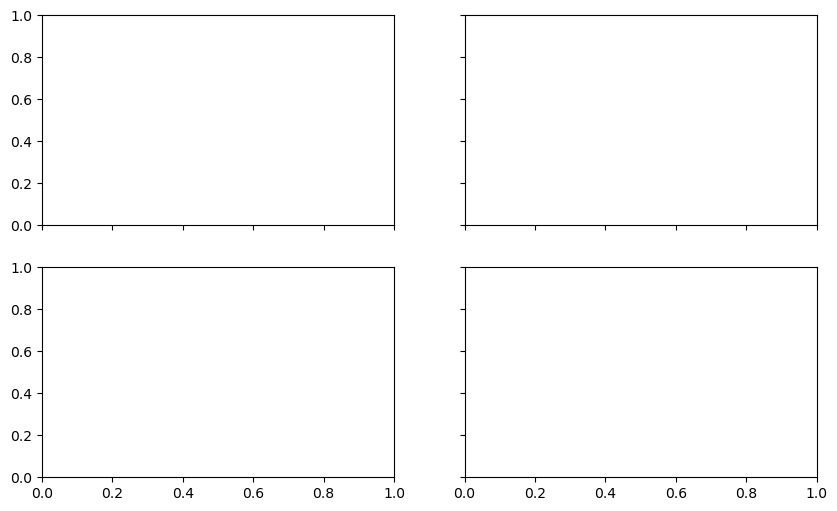

In [88]:
# Create the boxplot
plot = train_data.boxplot(column='Age', by=['Survived'], figsize=(10, 6), fontsize=13)
plot.title('Boxplot of Age by Sex and Survival Status')
plot.suptitle('')  # Remove the autogenerated title
plot.xlabel('Grouped by Sex and Survived')
plot.ylabel('Age')
plot.show()